In [1]:
%matplotlib inline
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
quandl.ApiConfig.api_key = 'YOUR KEY HERE'
def get_data(code_list):
    all_data=[]
    for each_code in code_list: 
        ary=quandl.get(f'ZILLOW/{each_code}', returns='numpy')
#         all_data[each_code]=ary
        one_df=pd.DataFrame(ary)
        one_df=one_df.rename({'Value': each_code}, axis=1)#, columns=['Date', each_code])
        one_df=one_df.set_index('Date')
        all_data.append(one_df)
    df=pd.concat(all_data, axis=1)
    return df

In [3]:
df = get_data(['M9_MRP1B', 'M9_MRP2B', 'M9_MRP3B', 'M9_MRP4B', 'M9_MRPAH'])
df = df.rename(columns={"M9_MRP1B": "Median Rent Price- 1BR", 
                        "M9_MRP2B": "Median Rent Price- 2BR", 
                        "M9_MRP3B": "Median Rent Price- 3BR", 
                        "M9_MRP4B": "Median Rent Price- 4BR", 
                        "M9_MRPAH": "Median Rent Price- All Homes"})
df.head()

,Median Rent Price- 1BR,Median Rent Price- 2BR,Median Rent Price- 3BR,Median Rent Price- 4BR,Median Rent Price- All Homes
Date,,,,,
2010-01-31,NaN,NaN,NaN,NaN,1012.5
2010-02-28,1000.0,900.0,1000.0,NaN,1150.0
2010-03-31,995.0,950.0,1050.0,1495.0,1195.0
2010-04-30,1000.0,950.0,1100.0,1500.0,1200.0
2010-05-31,1000.0,950.0,1100.0,1500.0,1200.0


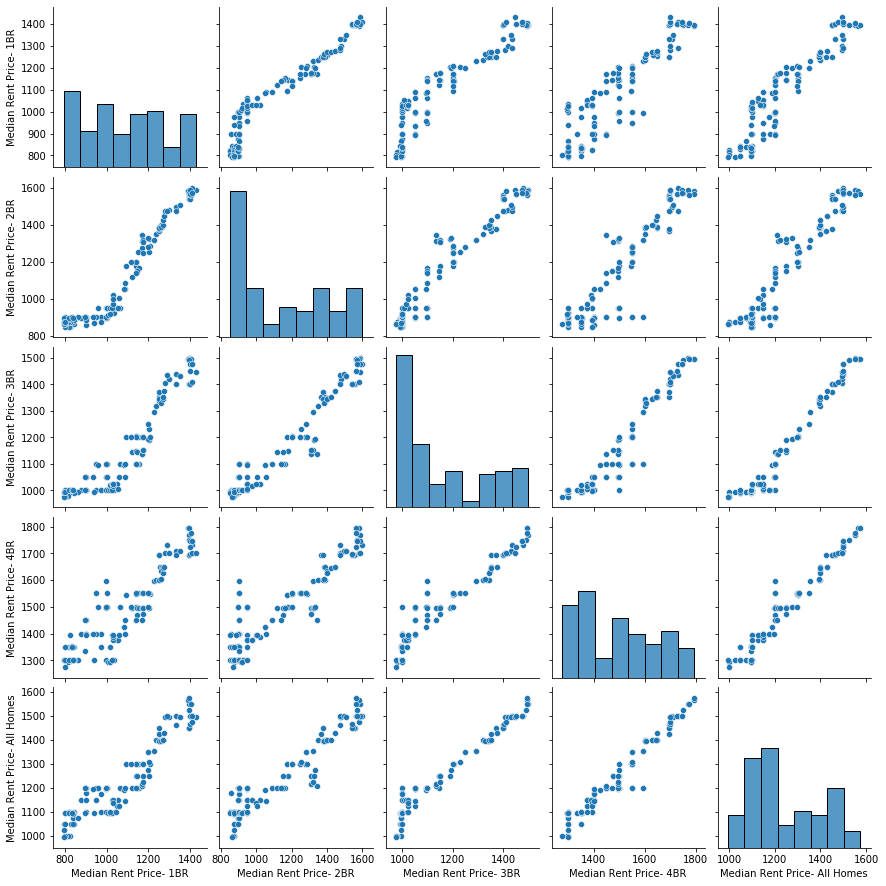

In [4]:
import seaborn as sns
drop_na_df=df.dropna()
sns.pairplot(drop_na_df)
drop_na_df.head()
plt.savefig('PairPlot-#BR.png')

# This pairplot compares the Median Rent Prices of 1BR, 2BR, 3BR, 4BR, and all homes. 